### Displaying distance matrices

Read csv tables and display distrance matrices among objects (i.e. RMSD values between all proteins)

In [20]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
# RMSD data
data_name = 'models_db2_blastp_fwd.txt'
#data_name = 'RMSD.csv'
df = pd.read_csv('/Users/johnny/github_home/BioInfoTools/IPYTHON_NOTEBOOKS/data/models_v2/%s' %data_name)
df_rev[['p_id', 'p_id2']] = df[['p_id2', 'p_id']]
df = df[0:5]
df_rev = df_rev[0:5]
df = df.append(df_rev, ignore_index=True)
df = df[df.p_id != df.p_id2] # remove all entries 
df = df.pivot(index='p_id', columns='p_id2', values='evalues')
df

#df = df.fillna(0)
#df.to_csv(path_or_buf='/Users/johnny/Desktop/HA_models_db2.csv', sep=',')


p_id2,ABB87844,AGG27706,AGG27863,AGL60617,AHN97094
p_id,,,,,
ABB87844,NaN,0,0,0,0
AGG27706,0,NaN,NaN,NaN,NaN
AGG27863,0,NaN,NaN,NaN,NaN
AGL60617,0,NaN,NaN,NaN,NaN
AHN97094,0,NaN,NaN,NaN,NaN


The df.loc[x, y] sorts the elements in df, according to the x and y lists.
For example we can sort both rows and columns of the df table using the maps.index since we have the same indexes in the df table. Note that the maps.index is already sorted according to the HA subtypes.
table = df.loc[maps.index, maps.index]    

In [71]:
data = df.loc[maps.index, maps.index]

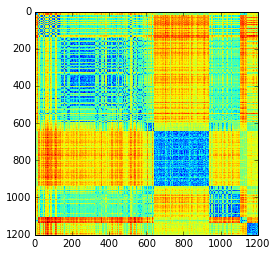

In [72]:
plt.imshow(data, interpolation='None')

In [75]:
# Table subselection for testing

n_init_m = 0
n_end_m = len(table.index)
selection_m = table.ix[n_init_m:n_end_m, n_init_m:n_end_m]

#d = maps.sero.to_dict()

# Grouping elements by maps.subtypes (useful for statistics)
subtype_group = maps.groupby('sero').size()
#subtype_group

# Take the class names (ref and cl lists can be used for serotype/protein data labeling)
ref = data.index
cl = [maps.sero[i] for i in ref]

In [76]:
# Cell for plotting heatmap
def plot():
    %matplotlib inline
    fig = plt.figure(figsize=(30, 30), dpi=80)

    plt.pcolor(data, cmap=plt.cm.Blues)
    #plt.xticks(np.arange(min(data.index), max(data.index)+10, fontsize=30))
    plt.xticks(np.arange(0.5, len(data.index), 1), cl, fontsize=5, rotation='vertical')
    plt.yticks(np.arange(0.5, len(data.columns), 1), cl, fontsize=5, rotation='horizontal')
    #plt.show()
    
    fig1 = plt.gcf()
    #plt.show()
    #plt.draw()
    fig1.savefig('VAT_dataset_II.png', dpi=300)
    
#plot()